<a href="https://colab.research.google.com/github/fzanart/GHDomains/blob/main/relevant_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GHDomains/tests_data.csv')
df['Refactoring ratio'] = df['Refactoring commits'] / df['Total commits']
df

,Name,Domain,Refactoring commits,Non refactoring commits,Total commits,Ownership,Major contributors,Minor contributors,Total contributors,Workflows,Refactoring ratio
0,vuejs/devtools,Web libraries and frameworks,246,1723,1969,0.468766,3,115,118,1,0.124937
1,futurice/android-best-practices,Documentation,31,216,247,0.303644,5,47,52,0,0.125506
2,microsoft/Web-Dev-For-Beginners,Documentation,60,1205,1265,0.265613,4,133,137,1,0.047431
3,airbnb/react-sketchapp,Web libraries and frameworks,123,657,780,0.482051,3,64,67,0,0.157692
4,eugeneyan/applied-ml,Documentation,22,377,399,0.809524,1,36,37,0,0.055138
...,...,...,...,...,...,...,...,...,...,...,...
884,graphql/dataloader,Non-web libraries and frameworks,13,156,169,0.556213,2,46,48,0,0.076923
885,junyanz/CycleGAN,Non-web libraries and frameworks,6,92,98,0.724490,3,9,12,0,0.061224
886,Tencent/wcdb,Application & System software,212,858,1070,0.764486,2,18,20,0,0.198131
887,halfrost/Halfrost-Field,Non-web libraries and frameworks,1,1025,1026,0.998051,1,2,3,1,0.000975


In [ ]:
sample = df.sample(n=45, random_state=1)
sample.index

Int64Index([386, 258, 770, 207, 682,   3, 676, 541, 531,   2,   6, 701,  17,
            617, 286, 473, 202, 345, 795,  34,  73, 723, 216,  59, 788, 502,
            309, 349, 638,  81, 414, 736, 426, 801, 739,  56, 223, 443, 311,
            154,   8, 248, 117,  94, 554],
           dtype='int64')

In [ ]:
features = ['Refactoring commits', 'Non refactoring commits',
       'Total commits', 'Ownership', 'Major contributors',
       'Minor contributors', 'Total contributors', 'Workflows',
       'Refactoring ratio']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(df[features])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
len(projections)

889

In [ ]:
df['Refactoring ratio']

0      0.124937
1      0.125506
2      0.047431
3      0.157692
4      0.055138
         ...   
884    0.076923
885    0.061224
886    0.198131
887    0.000975
888    0.077612
Name: Refactoring ratio, Length: 889, dtype: float64

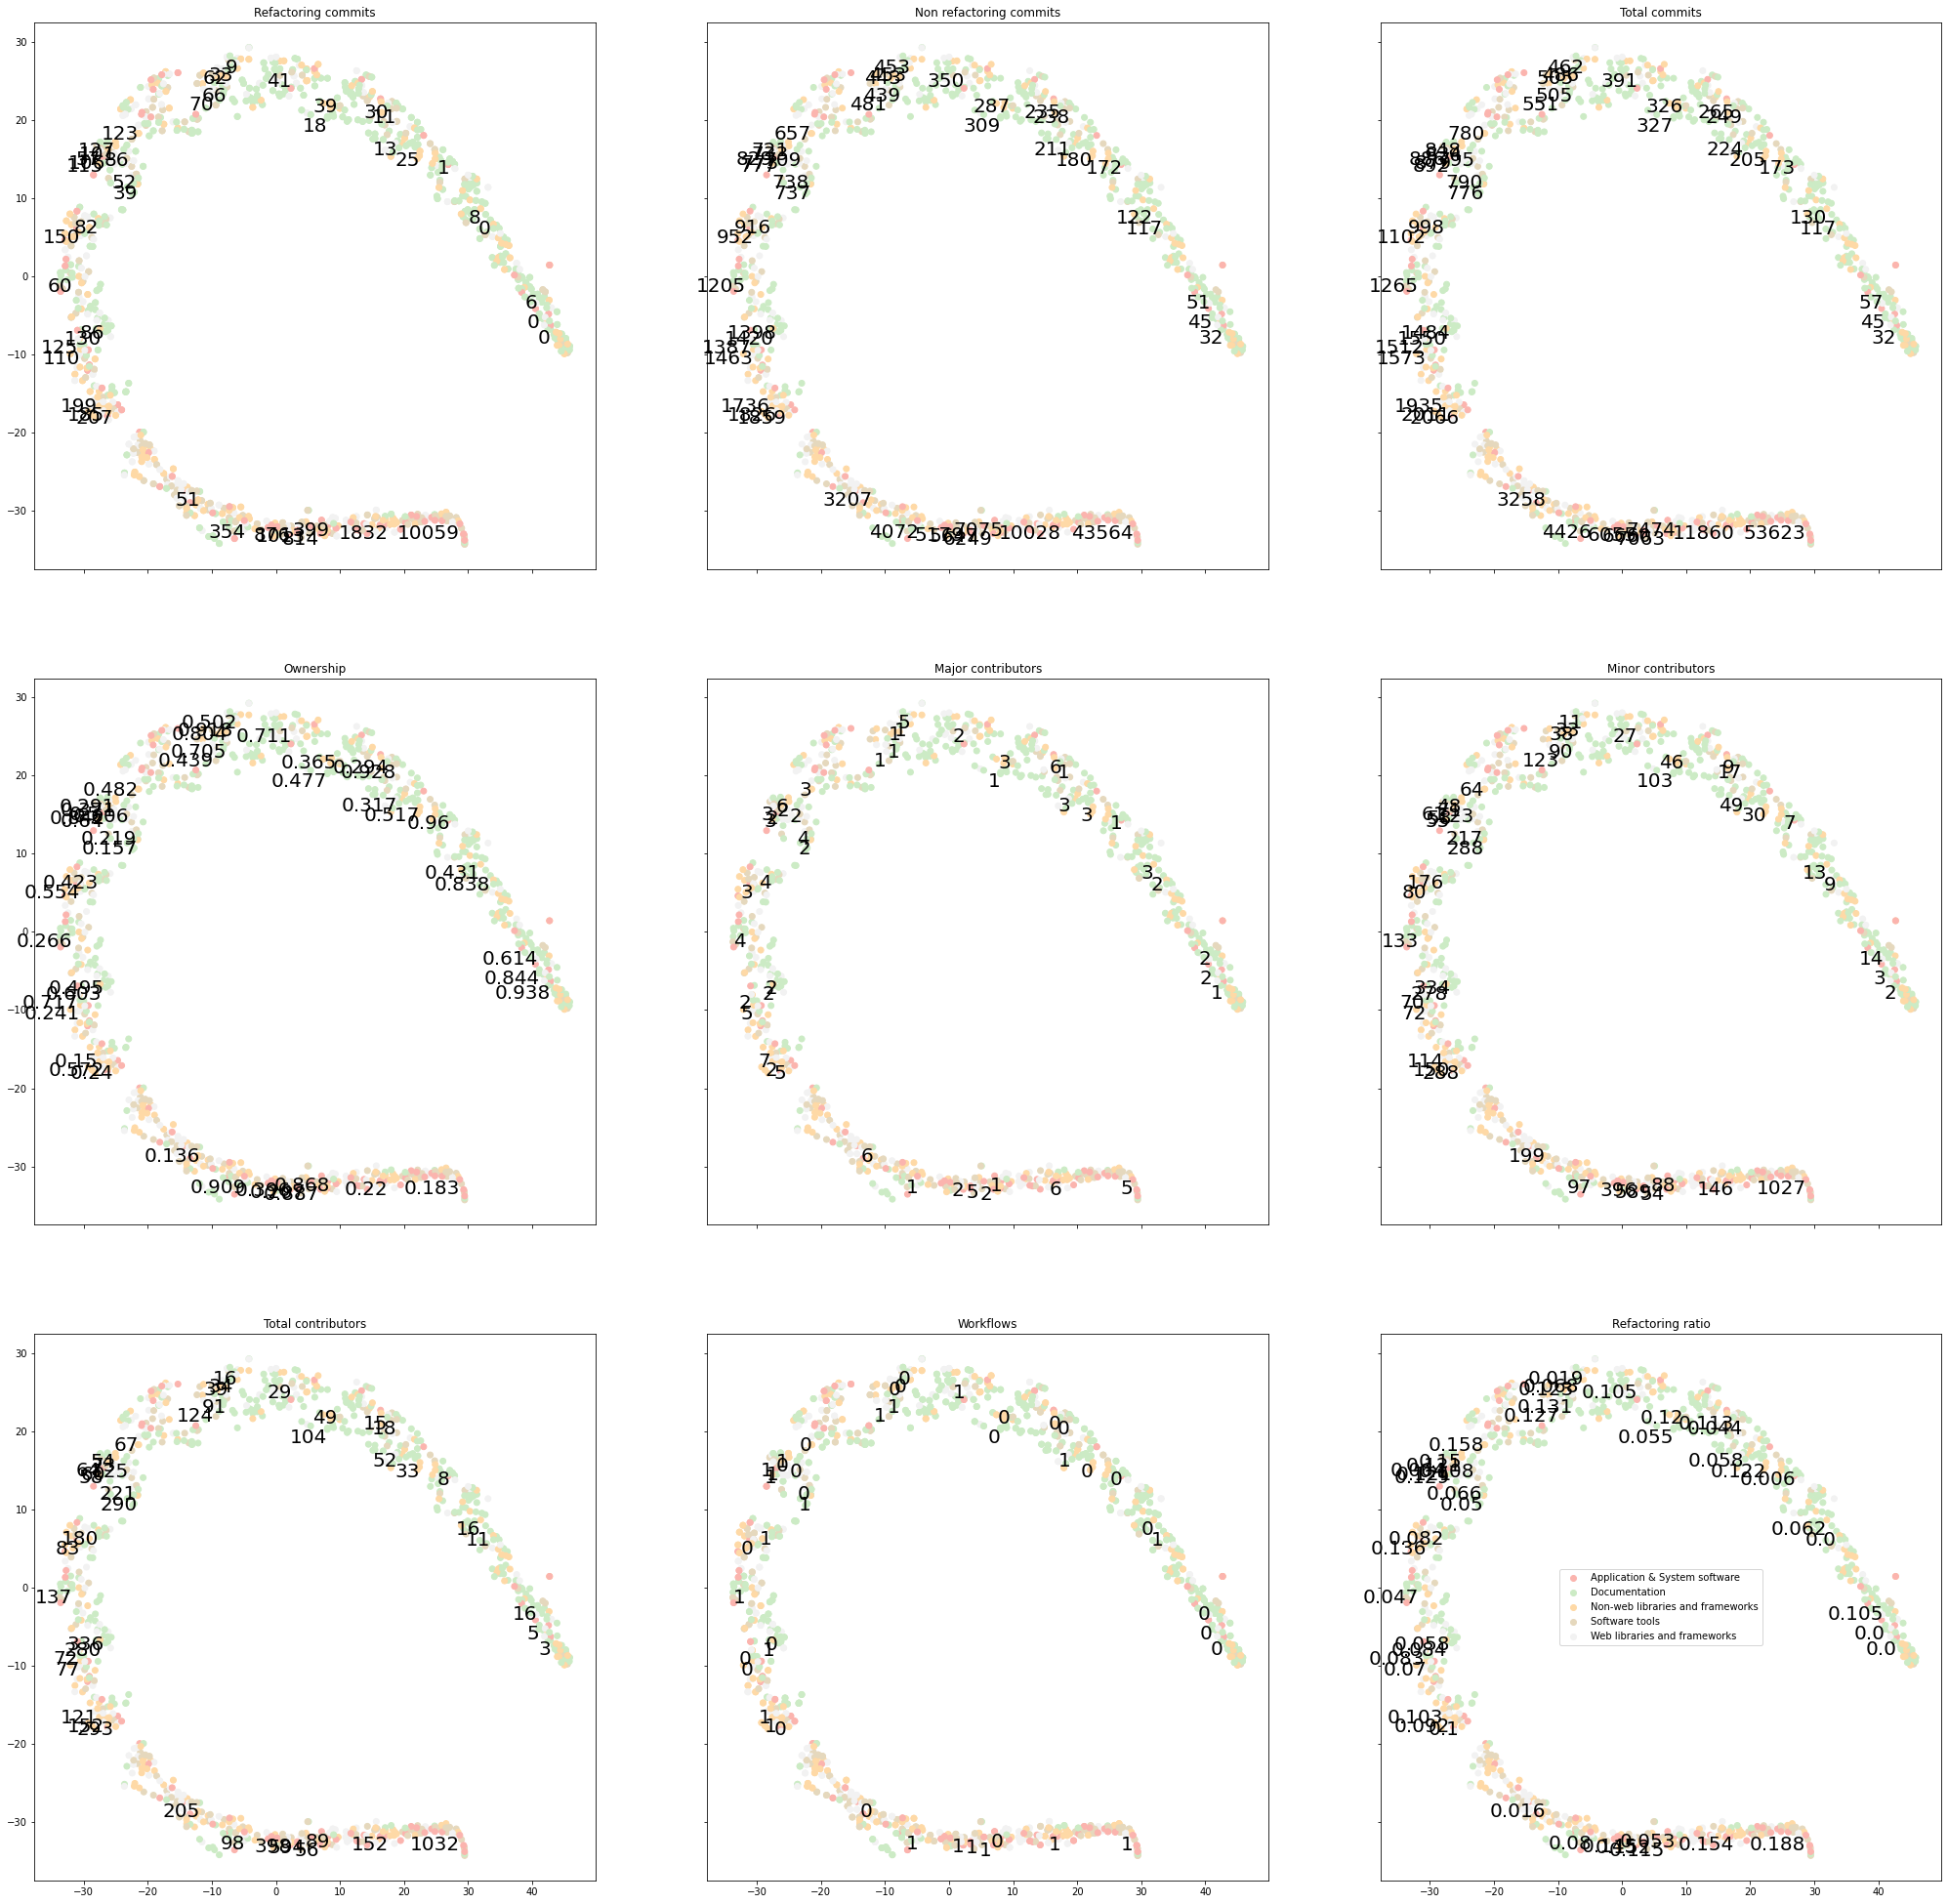

In [ ]:
df['cat_domain'] = df['Domain'].astype('category')
df['cat_domain'] = df['cat_domain'].cat.codes
df['cat_domain']

fontsize = 20

x = projections[:,0]
y = projections[:,1]

f,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True, sharey=True,figsize=(35,35))
ax1.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax2.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax3.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax4.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax5.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax6.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax7.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax8.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax8.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')
ax9.scatter(x, y, c=df['cat_domain'], cmap='Pastel1')

ax1.title.set_text('Refactoring commits')
ax2.title.set_text('Non refactoring commits')
ax3.title.set_text('Total commits')
ax4.title.set_text('Ownership')
ax5.title.set_text('Major contributors')
ax6.title.set_text('Minor contributors')
ax7.title.set_text('Total contributors')
ax8.title.set_text('Workflows')
ax9.title.set_text('Refactoring ratio')


for i, txt in enumerate(df['Refactoring commits']):
  if i in sample.index:
    ax1.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Non refactoring commits']):
  if i in sample.index:
    ax2.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Total commits']):
  if i in sample.index:
    ax3.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Ownership']):
  if i in sample.index:
    ax4.annotate(round(txt,3), (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Major contributors']):
  if i in sample.index:
    ax5.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Minor contributors']):
  if i in sample.index:
    ax6.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Total contributors']):
  if i in sample.index:
    ax7.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Workflows']):
  if i in sample.index:
    ax8.annotate(txt, (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

for i, txt in enumerate(df['Refactoring ratio']):
  if i in sample.index:
    ax9.annotate(round(txt,3), (x[i], y[i]), fontsize=fontsize, va='top', ha='right')

plt.legend(handles=ax1.scatter(x, y, c=df['cat_domain'], cmap='Pastel1').legend_elements()[0], labels=['Application & System software', 'Documentation', 'Non-web libraries and frameworks','Software tools', 'Web libraries and frameworks'])
#plt.show()
plt.savefig('/content/drive/MyDrive/GHDomains/Figures/markus_plot.pdf')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


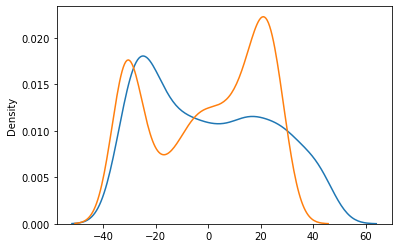

In [ ]:
sns.distplot(x,hist=False) #kde_kws={'clip': (0.0, 1.0)}
sns.distplot(y,hist=False)

[Text(0.5, 1.0, 'Title of Plot')]

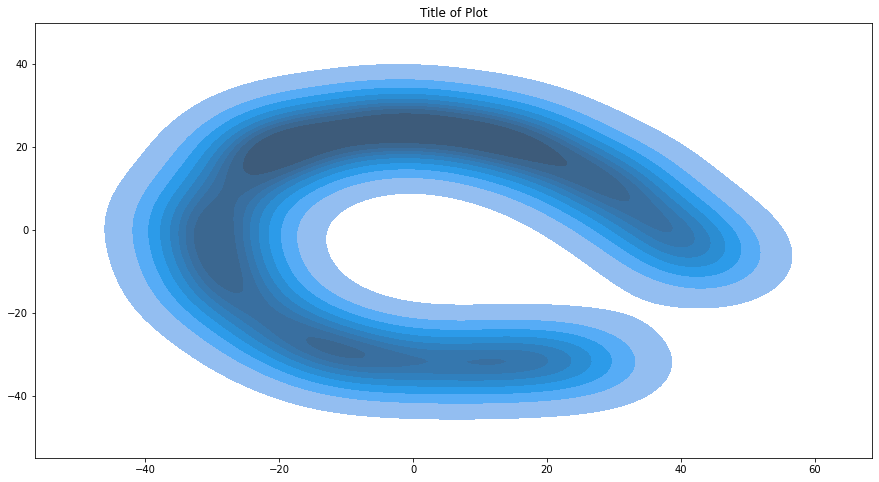

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(x=x,y=y, fill=True).set(title='Title of Plot')


In [ ]:
df['x'] = projections[:,0]
df['y'] = projections[:,1]
df

,Name,Domain,Refactoring commits,Non refactoring commits,Total commits,Ownership,Major contributors,Minor contributors,Total contributors,Workflows,Refactoring ratio,cat_domain,x,y
0,vuejs/devtools,Web libraries and frameworks,246,1723,1969,0.468766,3,115,118,1,0.124937,4,-27.789465,-15.946383
1,futurice/android-best-practices,Documentation,31,216,247,0.303644,5,47,52,0,0.125506,1,17.673210,18.576000
2,microsoft/Web-Dev-For-Beginners,Documentation,60,1205,1265,0.265613,4,133,137,1,0.047431,1,-31.765049,-0.106879
3,airbnb/react-sketchapp,Web libraries and frameworks,123,657,780,0.482051,3,64,67,0,0.157692,4,-21.454193,19.342432
4,eugeneyan/applied-ml,Documentation,22,377,399,0.809524,1,36,37,0,0.055138,1,0.613806,26.543488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,graphql/dataloader,Non-web libraries and frameworks,13,156,169,0.556213,2,46,48,0,0.076923,2,25.454882,11.359879
885,junyanz/CycleGAN,Non-web libraries and frameworks,6,92,98,0.724490,3,9,12,0,0.061224,2,35.227161,4.226907
886,Tencent/wcdb,Application & System software,212,858,1070,0.764486,2,18,20,0,0.198131,0,-31.061777,8.337083
887,halfrost/Halfrost-Field,Non-web libraries and frameworks,1,1025,1026,0.998051,1,2,3,1,0.000975,2,-32.937485,5.469905


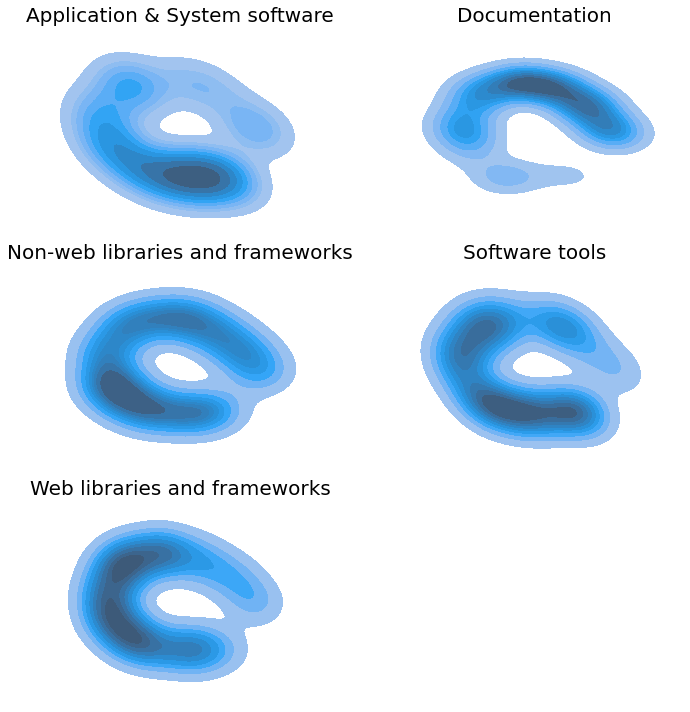

In [ ]:
domains = ['Application & System software', 'Documentation', 'Non-web libraries and frameworks','Software tools', 'Web libraries and frameworks']

f,axs = plt.subplots(3,2,sharex=True, sharey=True,figsize=(10,10))

for i, domain, ax in zip(range(6), domains, axs.flat):
  x = df[df['Domain'] == domain]['x']
  y = df[df['Domain'] == domain]['y']

  sns.kdeplot(x=x,y=y, fill=True, ax=ax)
  ax.set_title(domain,fontsize=20)
  ax.axis('off')

f.delaxes(axs[-1][-1])
plt.tight_layout()

f.savefig('/content/drive/MyDrive/GHDomains/Figures/mplot.svg', format='svg', dpi=1200)

In [ ]:
aux = df[df['Workflows'] == 1]
aux

,Name,Domain,Refactoring commits,Non refactoring commits,Total commits,Ownership,Major contributors,Minor contributors,Total contributors,Workflows,Refactoring ratio,cat_domain,x,y
0,vuejs/devtools,Web libraries and frameworks,246,1723,1969,0.468766,3,115,118,1,0.124937,4,-27.789465,-15.946383
2,microsoft/Web-Dev-For-Beginners,Documentation,60,1205,1265,0.265613,4,133,137,1,0.047431,1,-31.765049,-0.106879
5,jaywcjlove/linux-command,Software tools,15,851,866,0.676674,2,97,99,1,0.017321,3,-27.979918,16.663719
6,osquery/osquery,Software tools,876,5179,6055,0.396201,2,396,398,1,0.144674,3,2.381695,-31.976730
7,reduxjs/redux-thunk,Web libraries and frameworks,32,132,164,0.262195,4,44,48,1,0.195122,4,26.778036,9.547112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,eclipse/deeplearning4j,Non-web libraries and frameworks,495,1995,2490,0.534940,3,58,61,1,0.198795,2,-20.967548,-23.704872
874,xcatliu/typescript-tutorial,Documentation,8,343,351,0.803419,1,46,47,1,0.022792,1,6.056555,24.365284
879,akveo/react-native-ui-kitten,Non-web libraries and frameworks,226,573,799,0.389237,5,49,54,1,0.282854,2,-21.419865,18.278112
883,gregberge/svgr,Web libraries and frameworks,61,502,563,0.786856,1,96,97,1,0.108348,4,-9.903464,23.966673


In [ ]:
fig = px.scatter(x=aux['Refactoring ratio'], 
                 y=aux['Ownership'],
                 color=aux.Domain, 
                 labels={'color': 'Domain', 'x':'Refactoring ratio', 'y':'Ownership ratio'}, 
                 template='simple_white',
                 title="Workflow == 1 datapoins",
                 width=800, 
                 height=500)

fig.update_layout(legend=dict(
                  yanchor="bottom",
                  y=0.1,
                  xanchor="right",
                  x=0.99))
fig.show()